In [1]:
import glob 
import os
from tqdm import tqdm

covers = []

In [2]:
from pathlib import Path

for path in tqdm(Path('/volumes/Multimedia/FLAC/').rglob('*.jpg')):
    absolute = os.path.abspath(path)
    covers.append(absolute)

0it [00:00, ?it/s]


In [3]:
#len(os.listdir('/volumes/Multimedia/FLAC/'))

# Setup

In [300]:
import requests

#!pip install musicbrainzngs
#!pip install pyvis




In [5]:
import musicbrainzngs

In [6]:
auth = musicbrainzngs.auth("username","password")

In [7]:
(musicbrainzngs.set_useragent("app","Client_ID", 
                              contact="email"))

# Get Results for Artist ID Search

In [10]:
import pandas as pd

In [112]:
#Need to modify to label the purpose: Producer, Performer, etc

def get_artist_works(artist_id):

    result_artist = (musicbrainzngs.get_artist_by_id(artist_id
                                                     ,includes=['work-rels']))

    df_artist_work_relation = pd.DataFrame()

    df_artist_interate = pd.DataFrame(result_artist['artist']['work-relation-list'])

    #Work ID - Loop by length of dataframe - work[0] on outer to get id
    for x in range(len(df_artist_interate)):
        df_iter = pd.DataFrame(result_artist['artist']['work-relation-list'][x])
        df_artist_work_relation = pd.concat([df_artist_work_relation,df_iter])
        
    
    product = df_artist_work_relation.reset_index()
    
    artist_work_id = product[product['index']=="id"]['work'].to_list()
    artist_work_name = product[product['index']=="title"]['work'].to_list()
    
    
    
    return artist_work_id, artist_work_name, product

In [127]:
David_Byrne = 'd4659efb-b8eb-4f03-95e9-f69ce35967a9'



In [153]:
work_ids,work_names,_ = get_artist_works(David_Byrne)

In [176]:
from tqdm.autonotebook import tqdm
def establish_work_to_artist_relationships(work_ids):
    
    artist_names = []
    
    for ident in tqdm(work_ids):
    
        result_work = (pd.DataFrame(musicbrainzngs.get_work_by_id(ident
                                                                  ,includes=['artist-rels'])))

        works = pd.DataFrame(result_work['work']['artist-relation-list'])
       

        for x in range(len(works)):

            artist_names.append({f'Work_ID': ident, 'Artist_Name': works.iloc[x]['artist']['name']})

    
    return artist_names
    

    #pd.DataFrame(result_work['work']['artist-relation-list'][5])#['artist']['id']
    #Artist ID  - Loop by length of dataframe - artist[0] on outer to get id



In [177]:
a = establish_work_to_artist_relationships(work_ids)

In [181]:
b = pd.DataFrame(a)

artist_names = b['Artist_Name'].to_list()



In [336]:
#Visualize and takes care of duplicates for you
#Add nodes and edges properly

from pyvis.network import Network

# importing networkx  
import networkx as nx
from networkx import algorithms
# importing matplotlib.pyplot 
import matplotlib.pyplot as plt 

def visualize_graph(starter,connections1,connections2,yes=True):

    

    g = nx.Graph() 
    
    g.add_node(starter)

    for node in connections1:

        g.add_edge(node,starter)
        g.add_node(node)
 
        for branch in connections2:
            #g.add_edge(node,branch)
            g.add_node(branch)

    nt = Network("2000", "2000px")
    # populates the nodes and edges data structures
    nt.from_nx(g)
    nt.show("nx.html")
    
    return g
    #plt.savefig("filename.png")

In [337]:
g = visualize_graph(David_Byrne,work_names[:50],artist_names[:50],yes=False)

In [295]:
#Neighbors
for i in g.neighbors('David Byrne'):
    print(i)

Lazy
Paper Emperor


In [296]:
#Central Theme
nx.degree_centrality(g)

{'d4659efb-b8eb-4f03-95e9-f69ce35967a9': 0.5,
 'Lazy': 0.75,
 'Ashley Beedle': 0.5,
 'David Byrne': 0.5,
 'Paper Emperor': 0.75}

In [298]:
#Shortest Path
centrality.betweenness_centrality(g)

{'d4659efb-b8eb-4f03-95e9-f69ce35967a9': 0.05555555555555555,
 'Lazy': 0.25,
 'Ashley Beedle': 0.05555555555555555,
 'David Byrne': 0.05555555555555555,
 'Paper Emperor': 0.25}

# Artist Specific

In [172]:
result = musicbrainzngs.get_artist_by_id(artist_id,
              includes=['release-groups'],release_type=['album'])


#for release_group in result["artist"]["release-group-list"]:
#    print("{title} ({type})".format(title=release_group["title"],
#                                    type=release_group["type"]))

In [173]:
#result['artist']

In [174]:
import pandas as pd
df = pd.DataFrame(result["artist"]["release-group-list"])
df["first-release-date"] = pd.to_datetime(df["first-release-date"])  

df["year"] = pd.DatetimeIndex(df["first-release-date"]).year
df['month'] = pd.DatetimeIndex(df["first-release-date"]).month
df["day"] = pd.DatetimeIndex(df["first-release-date"]).day

In [175]:
df

,id,type,title,first-release-date,primary-type,secondary-type-list,year,month,day
0,428cc768-268a-405e-ba51-0d7cf61b1fff,Album,My Life in the Bush of Ghosts,1980-01-01,Album,NaN,1980.0,1.0,1.0
1,0dd5a352-6ae0-3e0d-bf18-bec30e27807d,Album,My Life in the Bush of Ghosts,1981-02-01,Album,NaN,1981.0,2.0,1.0
2,e2b07309-c2db-3234-9e60-08780261d7aa,Album,Music for The Knee Plays,1985-05-01,Album,NaN,1985.0,5.0,1.0
3,46cc3982-01c5-3beb-bc5d-92bd4fa9c5e9,Album,Rei Momo,1989-09-25,Album,NaN,1989.0,9.0,25.0
4,251dd16b-8185-3a22-8643-3ae149e534eb,Album,The Forest,1991-06-11,Album,NaN,1991.0,6.0,11.0
5,d42414b8-7e96-3217-853d-464c823f9d12,Album,Uh‐oh,1992-03-03,Album,NaN,1992.0,3.0,3.0
6,ca81a477-364f-3ee1-9d6a-e26c86393196,Album,Byrne: High Life for Strings / Moran: Music Fr...,1992-01-01,Album,NaN,1992.0,1.0,1.0
7,da1e5df4-7253-3005-82b5-c05ab6f4077a,Album,David Byrne,1994-05-20,Album,NaN,1994.0,5.0,20.0
8,26f97fa5-bb03-390e-bda5-e581b884760d,Album,Feelings,1997-05-23,Album,NaN,1997.0,5.0,23.0
9,18946270-568d-3bd9-8907-2301ca3bf392,Album,Look Into the Eyeball,2001-04-26,Album,NaN,2001.0,4.0,26.0


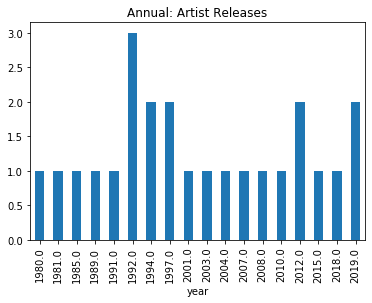

In [176]:
_ = df.groupby("year")["id"].count().plot(kind="bar",title="Annual: Artist Releases")

# Get Album Cover Art

In [177]:
release_id = "0dd5a352-6ae0-3e0d-bf18-bec30e27807d"
#"7e643344-946e-4118-b934-6574695e68bf"
data = musicbrainzngs.get_release_group_image_list(release_id)


for image in data["images"]:
    if "Front" in image["types"] and image["approved"]:
        print("%s is an approved front image!" % image["thumbnails"]["large"])
        image_link = image["thumbnails"]["large"]
        break
        


http://coverartarchive.org/release/f7345598-ef59-44e1-88d0-4b428977fda1/26900731558-500.jpg is an approved front image!


# Track Specific

In [128]:
#musicbrainzngs.get_release_group_by_id(release_id, includes=['releases'])

In [129]:
#musicbrainzngs.get_release_by_id('f7345598-ef59-44e1-88d0-4b428977fda1',includes=['recordings'])

In [130]:
#musicbrainzngs.get_recording_by_id('ae077045-d684-466d-823e-b6f229733a5b',includes=['artist-credits'])

In [23]:
#response = requests.get(image_link, stream=True)
#with open('img.png', 'wb') as out_file:
#    shutil.copyfileobj(response.raw, out_file)